In [61]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [8]:
sales = pd.read_csv('../../../data/Philadelphia_Crime_Rate_noNA.csv')

In [9]:
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25,8.0,Aston,Delaware
3,110490,11.0490,49.4,25,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19,3.9,Bristol B.,Bucks


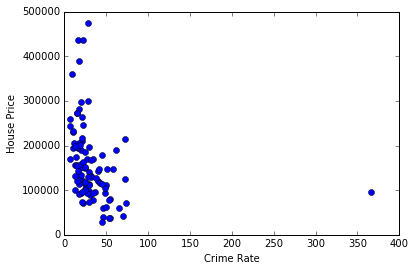

In [29]:
# sales.show(view = 'Scatter Plot', x = 'CrimeRate', y = 'HousePrice')
plt.plot(sales['CrimeRate'], sales['HousePrice'], 'o');
plt.xlabel('Crime Rate');
plt.ylabel('House Price');

# Fit Regression Model Using CrimeRate as Predictor

In [17]:
lr = LinearRegression()

In [39]:
# sklearn fit functions expect X to be matrix like. Reshape:
X = sales['CrimeRate'].reshape(-1, 1) 
y = sales['HousePrice']
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Visualize Fit

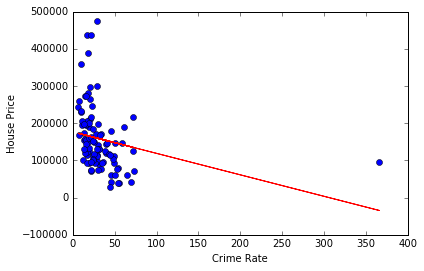

In [40]:
plt.plot(X, y, 'bo',
         X, lr.predict(X), 'r-');
plt.xlabel('Crime Rate');
plt.ylabel('House Price');

## Remove Outlier (City Center)

In [41]:
# sales_noCC = sales[sales['MilesPhila'] != 0]
sales_noCC = sales[sales['MilesPhila'] != 0]

In [42]:
X2 = sales_noCC['CrimeRate'].reshape(-1, 1) 
y2 = sales_noCC['HousePrice']
lr2 = LinearRegression()
lr2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

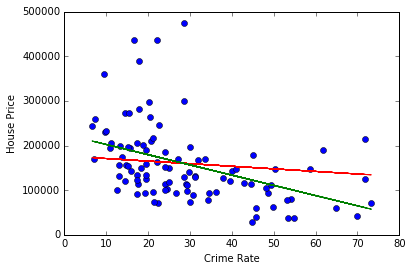

In [46]:
plt.plot(X2, y2, 'bo',
         X2, lr.predict(X2), 'r-',   # fit with all data (red)
         X2, lr2.predict(X2), 'g-'); # fit with outlier removed (green)
plt.xlabel('Crime Rate');
plt.ylabel('House Price');

## Compare Model Coefficients

In [53]:
print '%s\t%s\t%s'     %('Model              ', 'Intercept', 'Crime rate')
print '%s\t%.2f\t%.2f' %('Full data set      ', lr.intercept_, lr.coef_[0]) 
print '%s\t%.2f\t%.2f' %('City center removed', lr2.intercept_, lr2.coef_[0]) 

Model              	Intercept	Crime rate
Full data set      	176629.41	-576.91
City center removed	225233.55	-2288.69


## Train/Test Split
Use the larger data set

In [82]:
sales = pd.read_csv('../../../data/kc_house_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [87]:
# Split on the whole data set, not just the reduced (single-predictor) X used abov
# NOTE: col 3 is the response variable (y); cols 1 and 2 omitted
X = sales.iloc[:, 3:]
y = sales['price']

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [89]:
def single_predictor_lr(data, feature, response):
    feature = 'sqft_living'
    lr = LinearRegression()
    X = X_train.iloc[:, feature]
    lr.fit(X, response)
    (intercept, slope) = [lr.intercept, lr.coef_[0]]
    return (intercept, slope)

In [90]:
sqft_coefs = single_predictor_lr(data = X_train, feature = 'sqft_living', response = y_train)
sqft_coefs

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types